In [1]:
#라이브러리
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#csv 파일 가져오기
titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 빈 데이터 확인
# Dtype: object 다 변경해주기 모델 인식X
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
titanic_df.drop('PassengerId',axis=1, inplace=True)

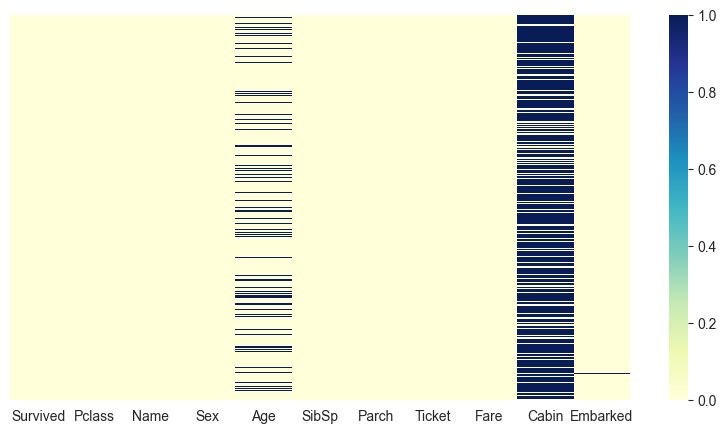

In [5]:
#비어있는 값 눈으로 확인하기
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.heatmap(titanic_df.isna(), yticklabels=False, cmap="YlGnBu")
sns.set
plt.show()

In [6]:
#Cabin은 데이터가 너무 많이 비어있어서 삭제제
titanic_df.drop('Cabin',axis=1, inplace=True)

In [7]:
#탑승 항구중 NaN값 출력
titanic_df[titanic_df.Embarked.isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [8]:
#1등석 + 탑승항구 출력
titanic_df[titanic_df['Pclass']==1]['Embarked'].value_counts()

Embarked
S    127
C     85
Q      2
Name: count, dtype: int64

In [9]:
# 항구에 NaN값을 S로 변경(최빈값)
titanic_df.Embarked.replace(np.nan,"S", inplace=True)

In [10]:
#S항구 +2된거 확인
titanic_df[titanic_df['Pclass']==1]['Embarked'].value_counts()

Embarked
S    129
C     85
Q      2
Name: count, dtype: int64

<Axes: xlabel='Sex'>

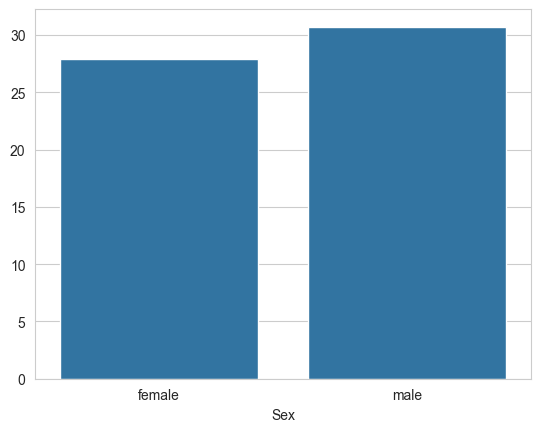

In [11]:
#남녀 평균나이
mean_ages = titanic_df.groupby('Sex')['Age'].mean()
#바차트로 출력
sns.barplot(x=mean_ages.index, y=mean_ages.values)

In [12]:
#남녀 평균나이 숫자로 출력
titanic_df.groupby('Sex')['Age'].agg(np.mean)

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<Axes: xlabel='Pclass'>

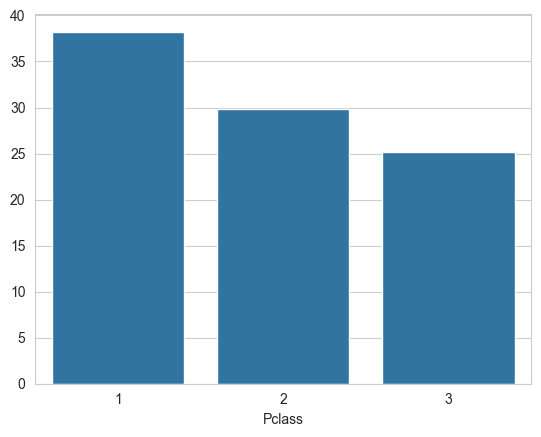

In [13]:
#등석 별로 평균나이
mean_ages = titanic_df.groupby('Pclass')['Age'].mean()
sns.barplot(x=mean_ages.index, y=mean_ages.values)

In [14]:
X_Pclassage=titanic_df.groupby('Pclass')['Age'].agg(np.mean)

In [15]:
def pclass_age(pclass,age):
    if np.isnan(age): #만약 나이가 null이면
        if pclass == 1: #만약 1등석이면
            return 38.23
        elif pclass == 2:
            return 29.87
        else:
            return 25.14
    else:
        return age

titanic_df['Age'] = titanic_df[['Pclass','Age']].apply(lambda x: pclass_age(x['Pclass'],x['Age']), axis=1)


In [16]:
titanic_df[titanic_df.Fare.isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


<Axes: xlabel='Fare', ylabel='Count'>

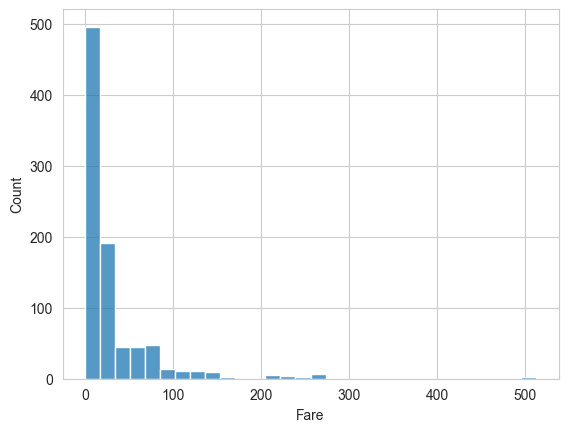

In [17]:
# Fare : 요금 비용
sns.histplot(titanic_df.Fare,bins=30)
#한쪽으로 치우쳐져있는것 확인

In [18]:
# groupby(1등석, 2등석, 3등석 승객들) Fare(지불한) mean(평균 요금)
titanic_df.groupby('Pclass')['Fare'].agg(np.mean)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [19]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [20]:
titanic_df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [21]:
titanic_df.groupby('Survived')['Embarked'].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           219
          C            93
          Q            30
Name: count, dtype: int64

In [22]:
# 생존한 사람들이 금액을 더 많이 냈다
titanic_df.groupby('Survived')['Fare'].agg(['mean','min','max'])

,mean,min,max
Survived,,,
0,22.117887,0.0,263.0000
1,48.395408,0.0,512.3292


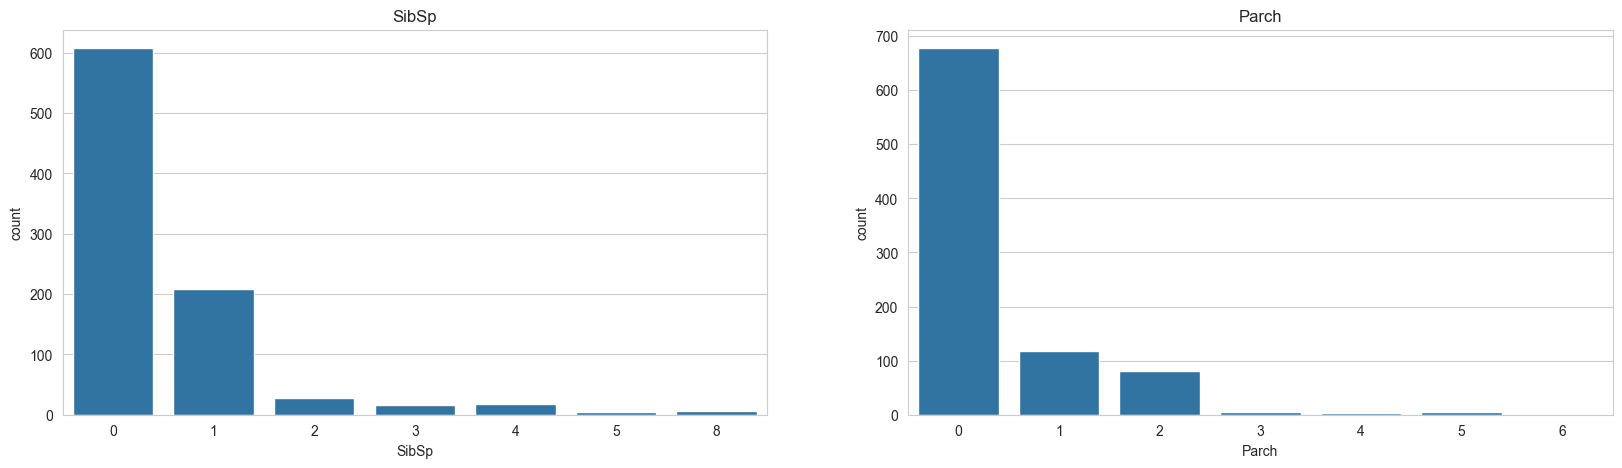

In [23]:
# nrows=1 : 1행, ncols=2 : 2열
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.barplot(x=titanic_df.SibSp.value_counts().index, y=titanic_df.SibSp.value_counts(), ax=ax[0])
ax[0].set_title('SibSp')
sns.barplot(x=titanic_df.Parch.value_counts().index, y=titanic_df.Parch.value_counts(), ax=ax[1])
ax[1].set_title('Parch')
plt.show()

In [24]:
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,S,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,S,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14,1,2,W./C. 6607,23.4500,S,3
889,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C,0


In [25]:
titanic_df.groupby ('Ticket')['Survived'].value_counts()
#일단 티켓은 버리고 시작해봄

Ticket       Survived
110152       1           3
110413       1           2
             0           1
110465       0           2
110564       1           1
                        ..
W./C. 6609   0           1
W.E.P. 5734  0           1
W/C 14208    0           1
WE/P 5735    0           1
             1           1
Name: count, Length: 730, dtype: int64

In [26]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Family    891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [27]:
# drop_first를 True로 줬기에 female과 male중에서 가장 먼저오는 female은 컬럼이 생성되지 않고 사라져 male만남음
titanic_df = pd.concat([titanic_df,pd.get_dummies(titanic_df['Sex'], drop_first=True)],axis=1)
titanic_df.drop('Sex', axis=1,inplace=True)

In [28]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
 9   Family    891 non-null    int64  
 10  male      891 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(3)
memory usage: 70.6+ KB


In [29]:
titanic_df['male'].to_frame()
#0이 여자 1이 남자

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [30]:
#Ticket 컬럼 삭제
titanic_df.drop('Ticket', axis=1, inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Family    891 non-null    int64  
 9   male      891 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(2)
memory usage: 63.6+ KB


In [31]:
titanic_df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [32]:
# drop_first가 없기에 각 컬럼들이 생성됨
titanic_df = pd.concat([titanic_df,pd.get_dummies(titanic_df['Embarked'])],axis=1)
titanic_df.drop('Embarked', axis=1,inplace=True)

In [33]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Family    891 non-null    int64  
 8   male      891 non-null    bool   
 9   C         891 non-null    bool   
 10  Q         891 non-null    bool   
 11  S         891 non-null    bool   
dtypes: bool(4), float64(2), int64(5), object(1)
memory usage: 59.3+ KB


In [34]:
titanic_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [36]:
titanic_df['Title'] = titanic_df.Name.apply(lambda x: x.split(" ")[1])

In [37]:
def titles(title,male):
    if title not in ['Mr.','Miss.','Mrs.','Master.']:
        if male == 1:
            return "Mr."
        else:
            return "Miss./Mrs."
    else:
        return title
        
titanic_df['Title'] = titanic_df[['Title','male']].apply(lambda x : titles(x['Title'],x['male']),axis=1)

In [38]:
titanic_df['Title'].value_counts()

Title
Mr.           537
Miss.         179
Mrs.          121
Master.        40
Miss./Mrs.     14
Name: count, dtype: int64

In [39]:
titanic_df.drop('Name', axis=1, inplace=True)

In [40]:
titanic_df = pd.concat([titanic_df,pd.get_dummies(titanic_df['Title'])],axis=1)
titanic_df.drop('Title', axis=1,inplace=True)


In [41]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Family      891 non-null    int64  
 7   male        891 non-null    bool   
 8   C           891 non-null    bool   
 9   Q           891 non-null    bool   
 10  S           891 non-null    bool   
 11  Master.     891 non-null    bool   
 12  Miss.       891 non-null    bool   
 13  Miss./Mrs.  891 non-null    bool   
 14  Mr.         891 non-null    bool   
 15  Mrs.        891 non-null    bool   
dtypes: bool(9), float64(2), int64(5)
memory usage: 56.7 KB


<Axes: xlabel='Age', ylabel='Count'>

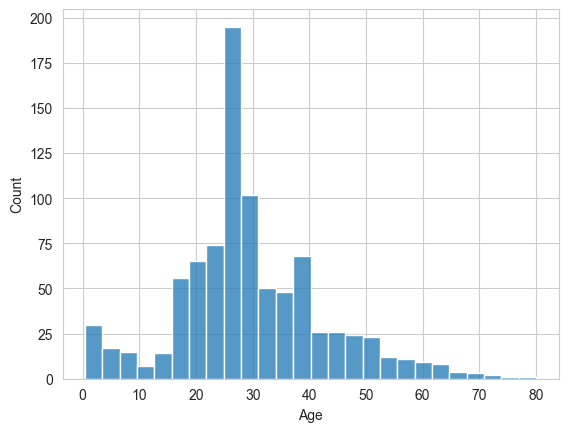

In [42]:
sns.histplot(titanic_df.Age)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
titanic_df[['Age','Fare']] = scalar.fit_transform(titanic_df[['Age','Fare']])

In [44]:
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,male,C,Q,S,Master.,Miss.,Miss./Mrs.,Mr.,Mrs.
0,0,3,0.271174,1,0,0.014151,1,True,False,False,True,False,False,False,True,False
1,1,1,0.472229,1,0,0.139136,1,False,True,False,False,False,False,False,False,True
2,1,3,0.321438,0,0,0.015469,0,False,False,False,True,False,True,False,False,False
3,1,1,0.434531,1,0,0.103644,1,False,False,False,True,False,False,False,False,True
4,0,3,0.434531,0,0,0.015713,0,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0.334004,0,0,0.025374,0,True,False,False,True,False,False,False,True,False
887,1,1,0.233476,0,0,0.058556,0,False,False,False,True,False,True,False,False,False
888,0,3,0.310631,1,2,0.045771,3,False,False,False,True,False,True,False,False,False
889,1,1,0.321438,0,0,0.058556,0,True,True,False,False,False,False,False,True,False


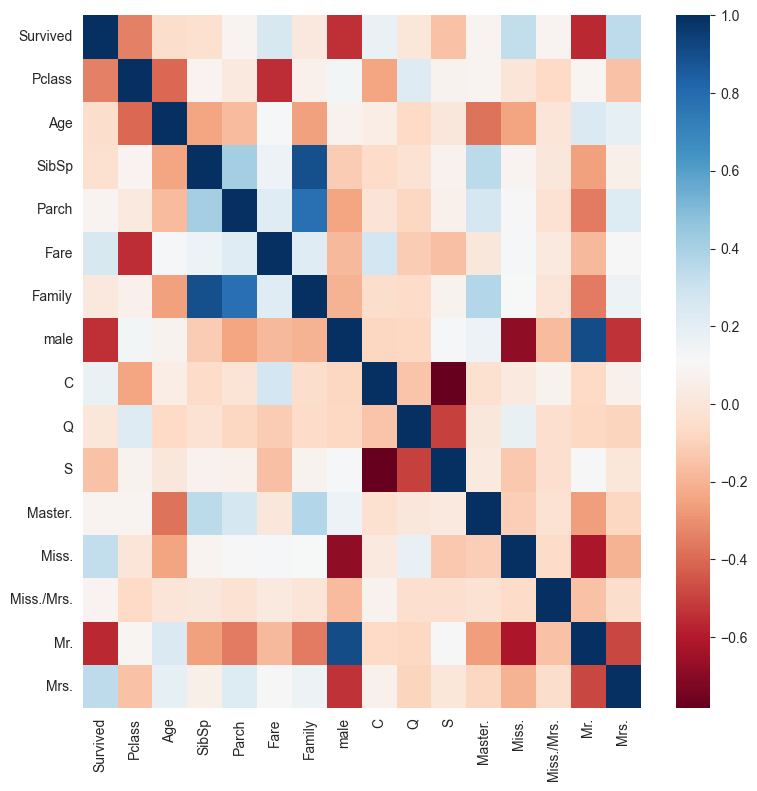

In [45]:
plt.figure(figsize=(9,9)) # 히트맵 그릴때는 정사각형으로 그리는게 좋음
corr = titanic_df.corr()
sns.heatmap(corr,cmap='RdBu') #Red -> Blue
plt.show()

### 로지스틱

In [46]:
from sklearn.model_selection import train_test_split
def get_train_test_dataset(df=None):
    X_features = titanic_df.drop('Survived', axis=1)
    y_label = titanic_df['Survived'].to_frame()
    X_train, X_test, y_train, y_test = train_test_split(
    X_features
    , y_label
    , test_size=0.3
    , random_state=0
    , stratify = y_label
    )
    return X_train, X_test, y_train, y_test

In [47]:
X_train, X_test, y_train, y_test = get_train_test_dataset(titanic_df)
X_test.shape, y_test.shape

((268, 15), (268, 1))

In [48]:
# 학습데이터와 테스트데이터 레이블의 비율
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
Survived
0           61.637239
1           38.362761
Name: count, dtype: float64
테스트 레이블 값 비율
Survived
0           61.567164
1           38.432836
Name: count, dtype: float64


In [49]:
# 로지스틱회귀 : 분류에 사용됨
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000) #오차를 구하는 반복 횟수
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [51]:
# get_clf_val(원래답(y_test), 예측값, 예측학룰)
# 예측값
lr_preds = lr_clf.predict(X_test)
# 예측확률
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, lr_preds, lr_pred_proba)

오차 행렬
[[151  14]
 [ 31  72]]
정확도: 0.8321, 정밀도: 0.8372, 재현율: 0.6990,    F1: 0.7619, AUC:0.8655


In [52]:
# 위 코드를 함수로 선언
def get_model_train_test(model, ftr_train=None, ftr_test=None,tgt_train=None, tgt_test=None):
    model.fit(ftr_train,tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test,pred,pred_proba)

### lightGBM

In [53]:
# lightGBM
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
          n_estimators=1000
        , num_leaves=64
        , n_jobs=-1 #cpu 풀가동
        , boost_from_average=False #극단적 불균형데이터일 경우 반드시 False로 설정해야함
        )

get_model_train_test(
      lgbm_clf
    , ftr_train=X_train
    , ftr_test=X_test
    , tgt_train=y_train
    , tgt_test=y_test
    )

# lgbm을 돌렸더니 재현율이 많이 줄어들음

오차 행렬
[[149  16]
 [ 34  69]]
정확도: 0.8134, 정밀도: 0.8118, 재현율: 0.6699,    F1: 0.7340, AUC:0.8406


In [54]:
# 이상치 찾기
def get_outlier(df= None, column = None, weight=1.5):
    fraud = df[df['Survived']==1][column]
    quantile_25 = np.percentile(fraud.values,25) #25% 위치에 있는 값
    quantile_75 = np.percentile(fraud.values,75) #75% 위치에 있는 값
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_value = quantile_25 - iqr_weight
    highest_value = quantile_75 + iqr_weight
    outlier_index = fraud[(fraud<lowest_value) | (fraud>highest_value)].index
    
    return outlier_index
    

In [55]:
# Fare 요금만 이상치 제거
outlier_index = get_outlier(df= titanic_df, column='Fare', weight=1.5)  #V14가 이상치가 있음
outlier_index

Index([ 31,  88, 195, 258, 268, 269, 299, 305, 311, 318, 319, 325, 334, 337,
       341, 380, 609, 660, 679, 689, 700, 708, 716, 730, 737, 742, 779, 856],
      dtype='int64')

In [56]:
#로그 변환 + 이상치 제거 함수
def get_preprocessed_df(df=None):
    df_copy = df.copy() # titanic_df ??넣어야하나? 넣어도 안바뀌는데...
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_Sclaed',amount_n)
    df_copy.drop(['Time','Amount'], axis = 1, inplace=True)
    
    # 이상치 데이터 삭제 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    outlier_index
    df_copy.drop(outlier_index, axis=0, inplace=True)
    
    return df_copy

# 데이터 분리
X_train, X_test, y_train, y_test = get_train_test_dataset(titanic_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_test(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### lgbm 예측 성능 ###')
get_model_train_test(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

outlier_index


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[151  14]
 [ 31  72]]
정확도: 0.8321, 정밀도: 0.8372, 재현율: 0.6990,    F1: 0.7619, AUC:0.8655
### lgbm 예측 성능 ###
오차 행렬
[[149  16]
 [ 34  69]]
정확도: 0.8134, 정밀도: 0.8118, 재현율: 0.6699,    F1: 0.7340, AUC:0.8406


Index([ 31,  88, 195, 258, 268, 269, 299, 305, 311, 318, 319, 325, 334, 337,
       341, 380, 609, 660, 679, 689, 700, 708, 716, 730, 737, 742, 779, 856],
      dtype='int64')

In [57]:
#삭제했는데 왜 출력됨..?
outlier_index

Index([ 31,  88, 195, 258, 268, 269, 299, 305, 311, 318, 319, 325, 334, 337,
       341, 380, 609, 660, 679, 689, 700, 708, 716, 730, 737, 742, 779, 856],
      dtype='int64')

### hyperopt

In [58]:
from hyperopt import hp
# 1 step : search_space 설정, XGBoost 하이퍼파라미터들의 범위 지정
xgb_search_space = {
    'max_depth' : hp.quniform('max_depth', 5,20,1) #5부터 20까지 1스텝안에서 best를 찾아봐라 
    #만약 20이 나오면 범위를 높게 주는거고 5가나오면 범위를 밑으로 줘야함
    , 'min_child_weight' : hp.quniform('min_child_weight',1,2,1)
    , 'learning_rate' : hp.uniform('learning_rate',0.01, 0.2)
    , 'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1)
}

In [59]:
# 2 step : objective function => return accuracy, auc
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

def objective_func(search_space):
    xgb_clf = XGBClassifier(
          n_estimatios = 200
        , max_depth = int(search_space['max_depth']) # max_depth가 실수값으로 반환되는데 정수로 입력해야하기에 int로 변환해야함
        , min_child_weight = int(search_space['min_child_weight'])
        , learning_rate = search_space['learning_rate']
        , closampe_bytree = search_space['colsample_bytree']
        , eval_metric = 'logloss'
    )
    accuracy = cross_val_score( # return [정확도, 정확도, ...., 정확도 ]
          xgb_clf # 교차 검증할 알고리즘 적용. 사이킷런 긱반 알고리즘들은 다 가능. fit 때문에 사이킷런 만 가능(파이썬기반 ㄴㄴ) (랜덤포레스트, xgb, gbm 등)
        , X_train # 전체 학습 데이터
        , y_train # 전체 학습 데이터의 답
        , scoring = 'accuracy'
        , cv = 3
    )# -1(-100%), -0.8(-80%)
    return {'loss': -1 * np.mean(accuracy), 'status': STATUS_OK} # -1을 곱했기에 -100%에서 100%라는 정확도를 뽑음


In [60]:
# 3 STEP : fmin => best
from hyperopt import fmin, tpe, Trials
trial_val = Trials() #결과 저장하는 객체
best = fmin(
      fn = objective_func
    , space = xgb_search_space # 위에 objective_func의 파라미터로 들어감
    , algo = tpe.suggest
    , max_evals= 50 # 짧아지면 성능이 아쉬울 수 있음. 그래서 장비가좋으면 크게 올리면 더 좋은 성과 보여줌
    , trials=trial_val #중간 결과 저장
    , rstate = np.random.default_rng(seed=9)
)
print(f'best : {best}')

100%|██████████| 50/50 [00:13<00:00,  3.71trial/s, best loss: -0.8267140468227425]
best : {'colsample_bytree': 0.5709901136927109, 'learning_rate': 0.06466333058186234, 'max_depth': 6.0, 'min_child_weight': 2.0}


In [61]:
best['learning_rate']

0.06466333058186234

In [62]:
best['max_depth']

6.0

In [63]:
# 조기 종료 -> 검증데이터 필요
X_tr, X_val, y_tr, y_val = train_test_split(
      X_train
    , y_train
    , test_size= 0.1
    , random_state= 156 #데이터 고정
)

In [64]:
# 4 STEP : BEST MODEL
xgb_clf =  XGBClassifier(
          # LGBMClassifier(
      n_estimaors = 1000 #400도 작음, 1000개정도 돌림
    , learning_rate = round(best['learning_rate'],5)
    , max_depth = int(best['max_depth'])
    , min_child_weight = int(best['min_child_weight'])
    , colsample_bytree = round(best['colsample_bytree'],5)
)

# 조기 종료 처리 -> 검증데이터 필요
evals = [(X_tr,y_tr), (X_val,y_val)]
# 학습 진행
xgb_clf.fit(
      X_tr
    , y_tr
    , early_stopping_rounds = 100
    , eval_metric = 'logloss'
    , eval_set = evals
    , verbose = True
)

[0]	validation_0-logloss:0.63219	validation_1-logloss:0.64558
[1]	validation_0-logloss:0.60620	validation_1-logloss:0.61475
[2]	validation_0-logloss:0.58427	validation_1-logloss:0.59462
[3]	validation_0-logloss:0.56256	validation_1-logloss:0.57333
[4]	validation_0-logloss:0.54155	validation_1-logloss:0.55061
[5]	validation_0-logloss:0.53180	validation_1-logloss:0.54430
[6]	validation_0-logloss:0.51637	validation_1-logloss:0.52846
[7]	validation_0-logloss:0.50045	validation_1-logloss:0.51233


[8]	validation_0-logloss:0.48570	validation_1-logloss:0.49765
[9]	validation_0-logloss:0.47498	validation_1-logloss:0.48911
[10]	validation_0-logloss:0.46344	validation_1-logloss:0.47826
[11]	validation_0-logloss:0.45626	validation_1-logloss:0.47436
[12]	validation_0-logloss:0.44769	validation_1-logloss:0.46496
[13]	validation_0-logloss:0.43940	validation_1-logloss:0.45625
[14]	validation_0-logloss:0.43246	validation_1-logloss:0.45164
[15]	validation_0-logloss:0.42670	validation_1-logloss:0.44781
[16]	validation_0-logloss:0.41854	validation_1-logloss:0.44272
[17]	validation_0-logloss:0.41171	validation_1-logloss:0.43477
[18]	validation_0-logloss:0.40602	validation_1-logloss:0.42966
[19]	validation_0-logloss:0.40051	validation_1-logloss:0.42832
[20]	validation_0-logloss:0.39518	validation_1-logloss:0.42853
[21]	validation_0-logloss:0.39053	validation_1-logloss:0.42689
[22]	validation_0-logloss:0.38660	validation_1-logloss:0.42636
[23]	validation_0-logloss:0.38218	validation_1-logloss:0.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.57099, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06466, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimaors=1000, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [65]:
# 예측값, 예측 확률 추출
preds = xgb_clf.predict(X_test)
pred_proba = xgb_clf.predict_proba(X_test)[:,1]

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [67]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[152  13]
 [ 31  72]]
정확도: 0.8358, 정밀도: 0.8471, 재현율: 0.6990,    F1: 0.7660, AUC:0.8627
